In [2]:
# Observations
  
# 1. The gender of the mice population was evenly balanced between male at 50.2% and female at 48.8%.  
#   Therefore, gender would not have skewed the analyis.
# 2. Final tumor volume was gathered and displayed in box plots for four treatments types
#  (Capomulin, Ramicane, Infubinol, and Ceftamin).  Of those, Capomulin and Ramicane show 
#  final tumor volume distributions that are much smaller than Infubinol and Ceftamin.   
#  Capomulin and Ramicane are the more successful treatments. 
# 3. Within the Capomulin data, there is a strong positive relationship between the weight 
#  of a mouse and the average volume of the tumor.  The correlation coefficient is .84.  
#  A perfectly positive relationship would be 1.0


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem


In [3]:
# Load data 
mouse_metadata = pd.read_csv("../../Resources/Matplotlib/Mouse_metadata.csv")
mouse_metadata_df=mouse_metadata
mouse_metadata_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Check shape
mouse_metadata_df.shape

(249, 5)

In [5]:
mouse_metadata_df = mouse_metadata_df.rename (columns= {'Mouse ID': 'MouseID'}, inplace=False)

In [6]:
# Calculate the number of unique mouse ID in the DataFrame
mouse_count = len(mouse_metadata_df["MouseID"].unique())
mouse_count

249

In [7]:
# Load data 
study_results = pd.read_csv("../../Resources/Matplotlib/Study_results.csv")
study_results_df=study_results
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Check shape
study_results_df.shape

(1893, 4)

In [9]:
study_results_df = study_results_df.rename (columns= {'Mouse ID': 'MouseID'}, inplace=False)

In [10]:
# Calculate the number of unique mouse ID in the DataFrame
mouse_count2 = len(study_results_df["MouseID"].unique())
mouse_count2

249

In [11]:
study_results_df.head()

,MouseID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [12]:
# Concatenate Mouse ID and Timepoint to identify Mouse/Time identifiers
study_results_df["DupID"] = study_results_df["MouseID"].astype(str) + study_results_df["Timepoint"].astype(str)  
study_results_df.head()

,MouseID,Timepoint,Tumor Volume (mm3),Metastatic Sites,DupID
0,b128,0,45.0,0,b1280
1,f932,0,45.0,0,f9320
2,g107,0,45.0,0,g1070
3,a457,0,45.0,0,a4570
4,c819,0,45.0,0,c8190


In [13]:
# Check shape
study_results_df.shape

(1893, 5)

In [14]:
# Remove duplicate data associated with Mouse/Time 
clean_study_results_df = study_results_df.drop_duplicates(subset= "DupID",keep=False, inplace=False)

In [15]:
# Check shape - and see that data has been reduced from 1893 to 1883 lines
clean_study_results_df.shape

(1883, 5)

In [16]:
# merge the clean study results dataframe with the mouse metadata dataframe 
merge_df = pd.merge(clean_study_results_df, mouse_metadata_df , on="MouseID", how="left")
merge_df

,MouseID,Timepoint,Tumor Volume (mm3),Metastatic Sites,DupID,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,b1280,Capomulin,Female,9,22
1,f932,0,45.000000,0,f9320,Ketapril,Male,15,29
2,g107,0,45.000000,0,g1070,Ketapril,Female,2,29
3,a457,0,45.000000,0,a4570,Ketapril,Female,11,30
4,c819,0,45.000000,0,c8190,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...,...
1878,r944,45,41.581521,2,r94445,Capomulin,Male,12,25
1879,u364,45,31.023923,3,u36445,Capomulin,Male,18,17
1880,p438,45,61.433892,1,p43845,Ceftamin,Female,11,26
1881,x773,45,58.634971,4,x77345,Placebo,Female,21,30


In [17]:
# Identify unique mouse count identified in merged dataframe.
mouse_count3 = len(merge_df["MouseID"].unique())
mouse_count3

249

In [18]:
#Begin Summary Statistics Analysis
# Calculate mean of Tumor Volume by Drug Regimen
mean_df = merge_df.groupby(['Drug Regimen'],as_index=False).agg({'Tumor Volume (mm3)': 'mean'})                                                         

In [19]:
mean_df.rename (columns= {'Tumor Volume (mm3)': 'Mean Tumor Vol'}, inplace=True)

In [20]:
# Calculate median of Tumor Volume by Drug Regimen
median_df = merge_df.groupby(['Drug Regimen'],as_index=False).agg({'Tumor Volume (mm3)': 'median'})  

In [21]:

median_df.rename (columns= {'Tumor Volume (mm3)': 'Median Tumor Vol'}, inplace=True)

In [22]:
# Calculate variance of Tumor Volume by Drug Regimen
var_df = merge_df.groupby(['Drug Regimen'],as_index=False).agg({'Tumor Volume (mm3)': 'var'})  

In [23]:
var_df.rename (columns= {'Tumor Volume (mm3)': 'Var Tumor Vol'}, inplace=True)

In [24]:
# Calculate standard deviation of Tumor Volume by Drug Regimen
stdev_df = merge_df.groupby(['Drug Regimen'],as_index=False).agg({'Tumor Volume (mm3)': 'std'})  

In [25]:
stdev_df.rename (columns= {'Tumor Volume (mm3)': 'St Dev Tumor Vol'}, inplace=True)

In [26]:
# Calculate standard erro of the mean mean of Tumor Volume by Drug Regimen
sem_df = merge_df.groupby(['Drug Regimen'],as_index=False).agg({'Tumor Volume (mm3)': 'sem'})  

In [27]:

sem_df.rename (columns= {'Tumor Volume (mm3)': 'SEM Tumor Vol'}, inplace=True)

In [28]:
from functools import reduce

In [29]:
# Combine the statistics dataframes 
data_frames = [mean_df, median_df, var_df, stdev_df, sem_df]

In [30]:
volume_stats_merge_df = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), data_frames)

In [31]:
#Display summary statistics table
print(volume_stats_merge_df)

  Drug Regimen  Mean Tumor Vol  Median Tumor Vol  Var Tumor Vol  \
0    Capomulin       40.675741         41.557809      24.947764   
1     Ceftamin       52.591172         51.776157      39.290177   
2    Infubinol       52.884795         51.820584      43.128684   
3     Ketapril       55.235638         53.698743      68.553577   
4     Naftisol       54.331565         52.509285      66.173479   
5      Placebo       54.033581         52.288934      61.168083   
6     Propriva       52.458254         50.854632      44.053659   
7     Ramicane       40.216745         40.673236      23.486704   
8     Stelasyn       54.233149         52.431737      59.450562   
9    Zoniferol       53.236507         51.818479      48.533355   

   St Dev Tumor Vol  SEM Tumor Vol  
0          4.994774       0.329346  
1          6.268188       0.469821  
2          6.567243       0.492236  
3          8.279709       0.603860  
4          8.134708       0.596466  
5          7.821003       0.581331  
6  

In [32]:
# Begin Mouse count by Regimen Analysis
# Calculate the number of mice in each treatment regimen
mice_regimen_df = merge_df.groupby(['Drug Regimen'],as_index=False).agg({'MouseID': 'count'})  

In [33]:
mice_regimen_df

,Drug Regimen,MouseID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,151
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [34]:
# Create Bar plot of data
x_axis = np.arange(len(mice_regimen_df))
tick_locations = [value+0.4 for value in x_axis]

Text(0, 0.5, 'Total Mice')

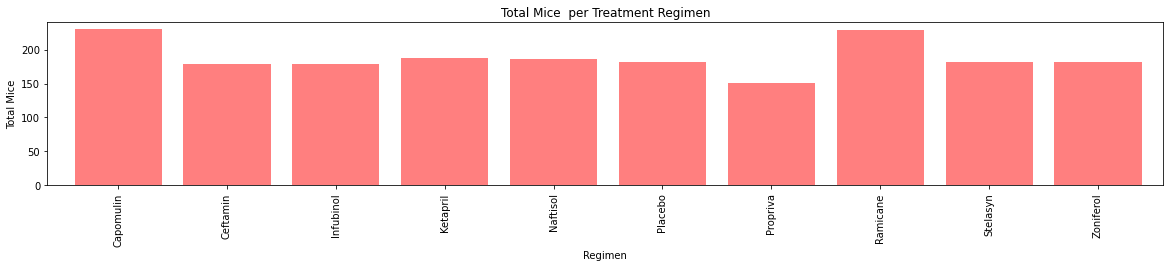

In [35]:
#Display Bar Plot
plt.figure(figsize=(20,3))
plt.bar(x_axis, mice_regimen_df["MouseID"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, mice_regimen_df["Drug Regimen"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(mice_regimen_df["MouseID"])+10)

# Set a Title and labels
plt.title("Total Mice  per Treatment Regimen")
plt.xlabel("Regimen")
plt.ylabel("Total Mice")

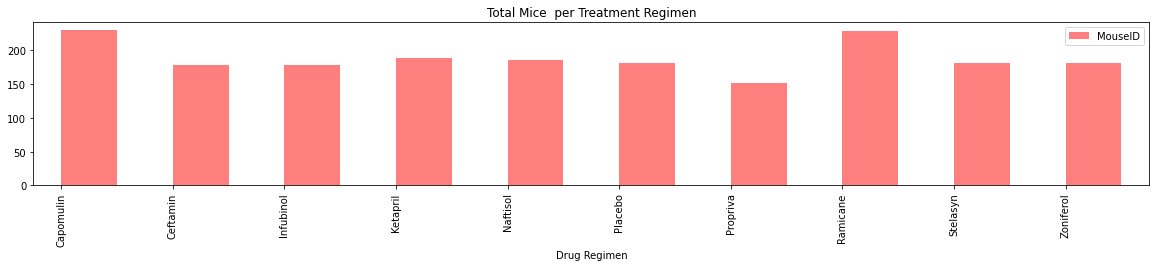

In [82]:
mice_regimen_df.plot(kind='bar', x="Drug Regimen",  figsize=(20,3), color='r',alpha=0.5, align="edge",
              title="Total Mice  per Treatment Regimen")

In [36]:
# Begin Gender analysis 
# Calculate gender count 
mice_gender_df = mouse_metadata_df.groupby(['Sex'],as_index=False).agg({'MouseID': 'count'}) 
mice_gender_df

,Sex,MouseID
0,Female,124
1,Male,125


Text(0.5, 1.0, 'Mouse Gender Distribution')

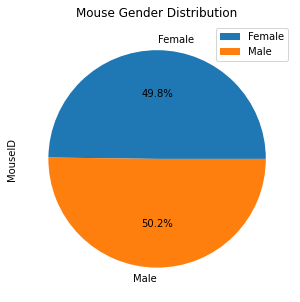

In [37]:
# Create Pie plot of data with pyplot
# Display Pie Plot
plot = mice_gender_df.plot.pie(y='MouseID', x='Sex', figsize=(5, 5),autopct="%1.1f%%", labels=mice_gender_df["Sex"])
plt.title("Mouse Gender Distribution")

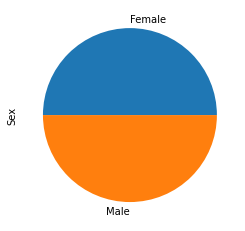

In [69]:
mice_gender_df['Sex'].value_counts()[:20].plot(kind='pie')


In [38]:
# Begin Final Tumor Volume Analysis
# Calculate the final Tumor Volume of each mouse across 4 regimens
# Step 1 isolate the 4 regimens
filtered_merge_df = merge_df.loc[ (merge_df["Drug Regimen"] == "Capomulin") |
                                 (merge_df["Drug Regimen"] == "Ramicane")|
                                 (merge_df["Drug Regimen"] == "Infubinol")|
                                 (merge_df["Drug Regimen"] == "Ceftamin") ] 

In [39]:
filtered_merge_df

,MouseID,Timepoint,Tumor Volume (mm3),Metastatic Sites,DupID,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,b1280,Capomulin,Female,9,22
29,c326,0,45.000000,0,c3260,Infubinol,Female,18,25
30,c139,0,45.000000,0,c1390,Infubinol,Male,11,28
31,v339,0,45.000000,0,v3390,Infubinol,Male,20,26
32,a577,0,45.000000,0,a5770,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...,...
1869,a644,45,32.978522,1,a64445,Ramicane,Female,7,17
1875,i177,45,33.562402,3,i17745,Ramicane,Male,10,18
1878,r944,45,41.581521,2,r94445,Capomulin,Male,12,25
1879,u364,45,31.023923,3,u36445,Capomulin,Male,18,17


In [40]:
print (filtered_merge_df)

     MouseID  Timepoint  Tumor Volume (mm3)  Metastatic Sites   DupID  \
0       b128          0           45.000000                 0   b1280   
29      c326          0           45.000000                 0   c3260   
30      c139          0           45.000000                 0   c1390   
31      v339          0           45.000000                 0   v3390   
32      a577          0           45.000000                 0   a5770   
...      ...        ...                 ...               ...     ...   
1869    a644         45           32.978522                 1  a64445   
1875    i177         45           33.562402                 3  i17745   
1878    r944         45           41.581521                 2  r94445   
1879    u364         45           31.023923                 3  u36445   
1880    p438         45           61.433892                 1  p43845   

     Drug Regimen     Sex  Age_months  Weight (g)  
0       Capomulin  Female           9          22  
29      Infubinol  

In [41]:
# Step 2 sort by mouseID and Timepoint in order to identify final volume
filtered_merge_df.sort_values(["MouseID","Timepoint"], ascending = (True,True))

,MouseID,Timepoint,Tumor Volume (mm3),Metastatic Sites,DupID,Drug Regimen,Sex,Age_months,Weight (g)
112,a203,0,45.000000,0,a2030,Infubinol,Female,20,23
385,a203,5,48.508468,0,a2035,Infubinol,Female,20,23
594,a203,10,51.852437,1,a20310,Infubinol,Female,20,23
752,a203,15,52.777870,1,a20315,Infubinol,Female,20,23
1009,a203,20,55.173336,1,a20320,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...,...
1283,z581,25,54.316407,2,z58125,Infubinol,Female,24,25
1332,z581,30,56.286750,2,z58130,Infubinol,Female,24,25
1482,z581,35,58.628399,3,z58135,Infubinol,Female,24,25
1714,z581,40,60.053740,3,z58140,Infubinol,Female,24,25


In [42]:
# Step 3 drop duplicates and keep the data from the last Timepoint - the final Volume metric
final_vol_df = filtered_merge_df.drop_duplicates(subset=['MouseID'], keep='last')

In [43]:
#Check shape 
final_vol_df.shape

(100, 9)

In [44]:
# Display dataframe with final Tumor Volume of each mouse across 4 regimens
display(final_vol_df)

,MouseID,Timepoint,Tumor Volume (mm3),Metastatic Sites,DupID,Drug Regimen,Sex,Age_months,Weight (g)
180,u153,0,45.000000,0,u1530,Ceftamin,Female,11,25
192,b447,0,45.000000,0,b4470,Ceftamin,Male,2,30
215,x226,0,45.000000,0,x2260,Ceftamin,Male,23,28
220,t573,0,45.000000,0,t5730,Ceftamin,Female,15,27
416,c326,5,36.321346,0,c3265,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...,...
1869,a644,45,32.978522,1,a64445,Ramicane,Female,7,17
1875,i177,45,33.562402,3,i17745,Ramicane,Male,10,18
1878,r944,45,41.581521,2,r94445,Capomulin,Male,12,25
1879,u364,45,31.023923,3,u36445,Capomulin,Male,18,17


In [45]:
# Clean the dataframe and remove columns
final_vol2_df = final_vol_df.drop(['Timepoint', 'Metastatic Sites', 'DupID', 'Sex','Age_months', 'Weight (g)' ], axis=1)
final_vol2_df 

,MouseID,Tumor Volume (mm3),Drug Regimen
180,u153,45.000000,Ceftamin
192,b447,45.000000,Ceftamin
215,x226,45.000000,Ceftamin
220,t573,45.000000,Ceftamin
416,c326,36.321346,Infubinol
...,...,...,...
1869,a644,32.978522,Ramicane
1875,i177,33.562402,Ramicane
1878,r944,41.581521,Capomulin
1879,u364,31.023923,Capomulin


In [46]:
# Create dataframe for Capomulin treatment
Cap_df = final_vol2_df[final_vol2_df['Drug Regimen'].isin(['Capomulin'])]
# get a look at the data with head function
Cap_df.shape
 

(25, 3)

In [47]:
# Calculate quartiles and IQR for Capomulin treatment
quartiles = Cap_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Capomulin treatment results")
print(f"The lower quartile of Final Tumor Volume is: {lowerq}")
print(f"The upper quartile of Final Tumor Volume is: {upperq}")
print(f"The interquartile range of Final Tumor Volume is: {iqr}")
print(f"The the median of Final Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Capomulin treatment results
The lower quartile of Final Tumor Volume is: 32.37735684
The upper quartile of Final Tumor Volume is: 40.1592203
The interquartile range of Final Tumor Volume is: 7.781863460000004
The the median of Final Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [48]:
# Identfy Outliers
Cap_Out_df = Cap_df[(Cap_df['Tumor Volume (mm3)'] > upper_bound) | 
                    (Cap_df['Tumor Volume (mm3)'] < lower_bound)]
Cap_Out_df

,MouseID,Tumor Volume (mm3),Drug Regimen


In [49]:
# Create dataframe for Ramicane treatment
Ram_df = final_vol2_df[final_vol2_df['Drug Regimen'].isin(['Ramicane'])]
# get a look at the data with head function
Ram_df.shape
 

(25, 3)

In [50]:
# Calculate quartiles and IQR for Ramicane treatment
quartiles = Ram_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Ramicane treatment results")
print(f"The lower quartile of Final Tumor Volume is: {lowerq}")
print(f"The upper quartile of Final Tumor Volume is: {upperq}")
print(f"The interquartile range of Final Tumor Volume is: {iqr}")
print(f"The the median of Final Tumor Volume is: {quartiles[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ramicane treatment results
The lower quartile of Final Tumor Volume is: 31.56046955
The upper quartile of Final Tumor Volume is: 40.65900627
The interquartile range of Final Tumor Volume is: 9.098536719999998
The the median of Final Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [51]:
# Identfy Outliers
Ram_Out_df = Ram_df[(Ram_df['Tumor Volume (mm3)'] > upper_bound) | 
                    (Ram_df['Tumor Volume (mm3)'] < lower_bound)]
Ram_Out_df

,MouseID,Tumor Volume (mm3),Drug Regimen


In [52]:
# Create dataframe for Infubinol treatment
Inf_df = final_vol2_df[final_vol2_df['Drug Regimen'].isin(['Infubinol'])]
# get a look at the data with head function
Inf_df.shape

(25, 3)

In [53]:
#Calculate quartiles and IQR for Infubinol treatment
quartiles = Inf_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Infubinol treatment results")
print(f"The lower quartile of Final Tumor Volume is: {lowerq}")
print(f"The upper quartile of Final Tumor Volume is: {upperq}")
print(f"The interquartile range of Final Tumor Volume is: {iqr}")
print(f"The the median of Final Tumor Volume is: {quartiles[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Infubinol treatment results
The lower quartile of Final Tumor Volume is: 54.04860769
The upper quartile of Final Tumor Volume is: 65.52574285
The interquartile range of Final Tumor Volume is: 11.477135160000003
The the median of Final Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [54]:
# Identfy Outliers
Inf_Out_df = Inf_df[(Inf_df['Tumor Volume (mm3)'] > upper_bound) | 
                    (Inf_df['Tumor Volume (mm3)'] < lower_bound)]
Inf_Out_df

,MouseID,Tumor Volume (mm3),Drug Regimen
416,c326,36.321346,Infubinol


In [55]:
# Create dataframe for Ceftamin treatment
Cef_df = final_vol2_df[final_vol2_df['Drug Regimen'].isin(['Ceftamin'])]
# get a look at the data with head function
Cap_df.shape

(25, 3)

In [56]:
#Calculate quartiles and IQR for Ceftamin treatment
quartiles = Cef_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Ceftamin treatment results")
print(f"The lower quartile of Final Tumor Volume is: {lowerq}")
print(f"The upper quartile of Final Tumor Volume is: {upperq}")
print(f"The interquartile range of Final Tumor Volume is: {iqr}")
print(f"The the median of Final Tumor Volume is: {quartiles[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ceftamin treatment results
The lower quartile of Final Tumor Volume is: 48.72207785
The upper quartile of Final Tumor Volume is: 64.29983003
The interquartile range of Final Tumor Volume is: 15.577752179999997
The the median of Final Tumor Volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [57]:
# Identfy Outliers
Cef_Out_df = Cef_df[(Cef_df['Tumor Volume (mm3)'] > upper_bound) | 
                    (Cef_df['Tumor Volume (mm3)'] < lower_bound)]
Cef_Out_df

,MouseID,Tumor Volume (mm3),Drug Regimen


In [58]:
import seaborn as sns

Text(0.5, 1.0, 'Distribution of final tumor volume for all four treatment regimens ')

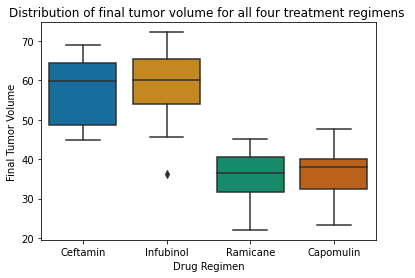

In [59]:
#Diplay box plots of final tumor volume for all 4 treatment regimens
sns.boxplot(y='Tumor Volume (mm3)', x='Drug Regimen', 
                 data=final_vol2_df, 
                 palette="colorblind")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume")
plt.title("Distribution of final tumor volume for all four treatment regimens ")

In [60]:
# Select one mouse from Capomulin treatment
one_mouse_df = merge_df [merge_df.MouseID == 'b128']
one_mouse_df

,MouseID,Timepoint,Tumor Volume (mm3),Metastatic Sites,DupID,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,b1280,Capomulin,Female,9,22
468,b128,5,45.651331,0,b1285,Capomulin,Female,9,22
674,b128,10,43.270852,0,b12810,Capomulin,Female,9,22
713,b128,15,43.784893,0,b12815,Capomulin,Female,9,22
925,b128,20,42.731552,0,b12820,Capomulin,Female,9,22
1258,b128,25,43.262145,1,b12825,Capomulin,Female,9,22
1390,b128,30,40.605335,1,b12830,Capomulin,Female,9,22
1537,b128,35,37.967644,1,b12835,Capomulin,Female,9,22
1619,b128,40,38.379726,2,b12840,Capomulin,Female,9,22
1754,b128,45,38.982878,2,b12845,Capomulin,Female,9,22


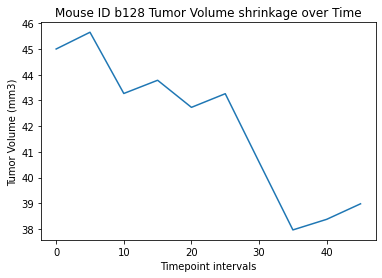

In [61]:
# Generate a line plot of tumor volume vs. time point for that mouse
x_values = one_mouse_df['Timepoint']
y_values = one_mouse_df['Tumor Volume (mm3)']
plt.plot(x_values,y_values)
plt.title("Mouse ID b128 Tumor Volume shrinkage over Time")
plt.xlabel('Timepoint intervals')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [62]:
# Isolate the Capomulin data
cap_volume_df = merge_df[merge_df['Drug Regimen'].isin(['Capomulin'])]
cap_volume_df

,MouseID,Timepoint,Tumor Volume (mm3),Metastatic Sites,DupID,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,b1280,Capomulin,Female,9,22
224,j246,0,45.000000,0,j2460,Capomulin,Female,21,21
225,r554,0,45.000000,0,r5540,Capomulin,Female,8,17
226,s185,0,45.000000,0,s1850,Capomulin,Female,3,17
227,b742,0,45.000000,0,b7420,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...,...
1844,s710,45,40.728578,1,s71045,Capomulin,Female,1,23
1849,j119,45,38.125164,1,j11945,Capomulin,Female,7,23
1868,i557,45,47.685963,1,i55745,Capomulin,Female,1,24
1878,r944,45,41.581521,2,r94445,Capomulin,Male,12,25


In [63]:
# Calculate the average tumor volume
weight_avgvol_df = cap_volume_df.groupby(['MouseID'],as_index=False).agg({'Tumor Volume (mm3)': 'mean', 
                                                                     'Weight (g)': 'first'})          

In [64]:
weight_avgvol_df.shape

(25, 3)

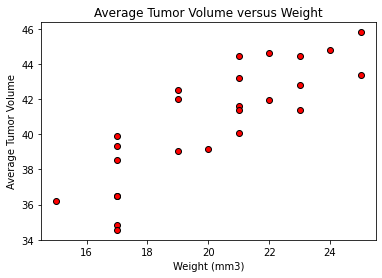

In [65]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
weight = weight_avgvol_df['Weight (g)']
volume = weight_avgvol_df['Tumor Volume (mm3)']
plt.scatter(weight, volume, marker="o", facecolors="red", edgecolors="black")
plt.title("Average Tumor Volume versus Weight")
plt.xlabel('Weight (mm3)')
plt.ylabel('Average Tumor Volume')
plt.show()

In [66]:
from scipy.stats import linregress

In [67]:
# Calculate the correlation coefficient between weight and average tumor volume
print(f"The correlation coefficient between weight and average tumor volume is {round(st.pearsonr(weight,volume)[0],2)}")

The correlation coefficient between weight and average tumor volume is 0.84


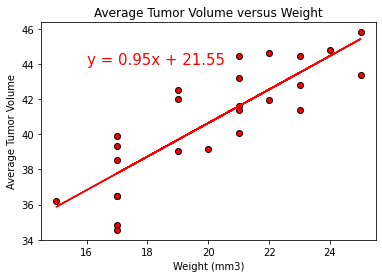

In [68]:
# Add the linear regression equation and line to plot
weight = weight_avgvol_df['Weight (g)']
volume = weight_avgvol_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, volume, marker="o", facecolors="red", edgecolors="black")
plt.plot(weight,regress_values,"r-")
plt.title("Average Tumor Volume versus Weight")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('Weight (mm3)')
plt.ylabel('Average Tumor Volume')
plt.show()